# DS150 | Module 2 Activity 1
Group Members:  
Aguaviva, Christopher  
Baluyot, Kent  
Berida, Ronabelle  



<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #dat_prep
- [Data Preparation][ref2]

[ref3]: #motiv
- [Motivations][ref3]

[ref4]: #exp_dat
- [Exploratory Data Analysis][ref4]
  
[ref5]: #res_discussion
- [Result and discussion][ref5]

[ref6]: #conc
- [Conclusion and Recommendations][ref6]

***

<a name="exec_summary"></a>
## Executive Summary

The analysis delved into a dataset concerning taxi rides, employing Python libraries like Pandas, Matplotlib, and Seaborn for data manipulation and exploratory data analysis (EDA). Initial steps involved data preparation, including column renaming, datetime conversion, and feature selection. EDA revealed insights into the distribution of numerical features like fare amount, mileage, and ride duration, while visualizations such as histograms and box plots aided in understanding variable distributions and relationships. Outliers were identified and removed from certain variables to ensure data integrity, and correlation analysis highlighted relationships between features. The analysis culminated in a pairplot visualization, offering a comprehensive view of pairwise relationships among key variables. Overall, the exploration provided valuable insights into the characteristics and relationships within the taxi ride dataset, aiding in further understanding and analysis.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement

Despite the ubiquity of taxi services, optimizing operational efficiency and customer satisfaction remains a challenge for taxi providers. The problem at hand is to leverage data-driven insights to enhance the performance and service quality of taxi operations. This entails understanding the factors influencing key metrics such as fare amount, mileage, and ride duration, as well as identifying opportunities for improvement in service delivery. By addressing these challenges, the goal is to maximize revenue, minimize operational costs, and ultimately enhance the overall customer experience. Therefore, the objective of this analysis is to identify patterns, trends, and correlations within the taxi ride dataset, leading to actionable recommendations for improving operational efficiency and customer satisfaction in the taxi service industry.


[ref]: #top
[Back to Table of Contents][ref]


<a name="motiv"></a>
## Motivation

The motivation behind this analysis stems from the increasing demand for efficient and customer-centric taxi services in urban environments. Taxi providers face numerous challenges in meeting these demands, including optimizing route planning, managing fleet operations, and ensuring customer satisfaction. By leveraging data-driven insights, we aim to address these challenges and drive improvements in operational efficiency and service quality. Understanding the underlying patterns and correlations within the taxi ride dataset can unlock valuable insights into factors affecting key metrics such as fare amount, mileage, and ride duration. These insights can inform strategic decision-making, enabling taxi providers to enhance route optimization, allocate resources effectively, and deliver personalized experiences to customers. Ultimately, the motivation is to harness the power of data analytics to transform taxi services, providing a seamless and enjoyable transportation experience for passengers while maximizing profitability for providers.


[ref]: #top
[Back to Table of Contents][ref]


***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 40)   # displays max columns of the DataFrame 
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']



<a name="data_prep"></a>
## Data Preparation
[ref]: #top
[Back to Table of Contents][ref]

As the data is too large for the interpreter to handle, we decided to create a list and divide the dataset into chunks of data. At the end, the data in the list are concatenated together and transformed into a DataFrame format. This method is to ensure faster and more efficient storage of data.

In [4]:
# Dividing the dataset into chunks of data and then combining it
file = "taxi_final.csv"
data_chunks = []
chunksize = 50000       # Specify chunksize (number of rows to read at a time)

for chunk in pd.read_csv(file, chunksize=chunksize, low_memory=False):
    data_chunks.append(chunk)

df = pd.concat(data_chunks, ignore_index=True)

In [4]:
df.head(3)

,Type,PROVIDER NAME,StartDateTime,DateCreated,ID,ExternalID,FareAmount,GratuityAmount,SurchargeAmount,ExtraFareAmount,TollAmount,TotalAmount,PaymentType,StartDateTime.1,EndDateTime,OriginStreetNumber,OriginStreetName,OriginCity,OriginState,OriginZip,OriginLatitude,OriginLongitude,DestinationStreetNumber,DestinationStreetName,DestinationCity,DestinationState,DestinationZip,DestinationLatitude,DestinationLongitude,Milage,Duration,Unnamed: 31
0,1.0,Yellow Cab,2017-12-01 00:01:06.0000000 +00:00,2017-12-01 00:09:54.4033333 +00:00,B467__82709__2017-12-01T00:09:54.403_36188498,36188498,7.57,1.83,0.25,0.25,0.0,11.00,1.0,2017-12-01 00:01:06.0000000 +00:00,2017-12-01 00:09:51.0000000 +00:00,NaN,"2660 WOODLEY RD NW, WASHINGTON, DC 20008, USA",NaN,DC,20008.0,38.92492,-77.05333,NaN,"1526 K ST NW, WASHINGTON, DC 20005, USA",NaN,DC,20005.0,38.90232,-77.03560,2.11,8.0,NaN
1,1.0,Yellow Cab,2017-12-01 00:05:27.0000000 +00:00,2017-12-01 00:11:43.4666667 +00:00,B369__52337__2017-12-01T00:11:43.467_36188500,36188500,4.60,0.00,0.25,1.25,0.0,7.47,1.0,2017-12-01 00:05:27.0000000 +00:00,2017-12-01 00:11:40.0000000 +00:00,NaN,"400 7TH ST NW, WASHINGTON, DC 20004, USA",NaN,DC,20004.0,38.89493,-77.02221,NaN,"1335 F ST NW, WASHINGTON, DC 20004, USA",NaN,DC,20004.0,38.89737,-77.03103,0.62,6.0,NaN
2,1.0,Yellow Cab,2017-12-01 00:07:01.0000000 +00:00,2017-12-01 00:13:01.3133333 +00:00,K781__91115__2017-12-01T00:13:01.313_36188501,36188501,5.14,1.00,0.25,0.25,0.0,8.01,1.0,2017-12-01 00:07:01.0000000 +00:00,2017-12-01 00:12:58.0000000 +00:00,NaN,"1345 VERMONT AVE NW, WASHINGTON, DC 20005, USA",NaN,DC,20005.0,38.90776,-77.03051,NaN,"1631-1651 18 ST NW, WASHINGTON, DC 20009, USA",NaN,DC,20009.0,38.91212,-77.04165,0.96,5.0,NaN


In [5]:
df.describe(include='all')

,Type,PROVIDER NAME,StartDateTime,DateCreated,ID,ExternalID,FareAmount,GratuityAmount,SurchargeAmount,ExtraFareAmount,TollAmount,TotalAmount,PaymentType,StartDateTime.1,EndDateTime,OriginStreetNumber,OriginStreetName,OriginCity,OriginState,OriginZip,OriginLatitude,OriginLongitude,DestinationStreetNumber,DestinationStreetName,DestinationCity,DestinationState,DestinationZip,DestinationLatitude,DestinationLongitude,Milage,Duration,Unnamed: 31
count,11872864.0,11937632,11937511,11937633,11937633,1.193763e+07,1.187299e+07,1.179124e+07,1.179111e+07,1.179111e+07,1.179111e+07,1.192407e+07,1.193751e+07,11937510,11937510,2185225,10876984,10311550,10962343,11872842,1.185575e+07,1.185276e+07,2185219,11001670,10089707,11005367,11872715,1.185563e+07,1.185270e+07,1.183018e+07,1.157841e+07,2.000000
unique,20.0,14,7630743,11088704,11937585,1.193754e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7630742,8320635,10302,465386,1248,29,1060,NaN,NaN,21157,996704,1974,37,1626,NaN,NaN,NaN,NaN,NaN
top,1.0,CMT,2017-09-13 14:46:00.0000000 +00:00,2017-04-04 12:49:32.6500000 +00:00,A875__81366__2017-05-01T22:20:11.680_31000153,-7.702472e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-13 14:46:00.0000000 +00:00,2017-04-18 18:33:00.0000000 +00:00,-,-,Washington,DC,-----,NaN,NaN,-,-,Washington,DC,-----,NaN,NaN,NaN,NaN,NaN
freq,10725102.0,2191385,109,6946,2,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109,50,1864416,1858304,6938196,8337084,1853265,NaN,NaN,1861265,1856195,6466616,7708793,1853144,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.279349e+01,1.432134e+00,2.482045e-01,6.006939e-01,4.384362e-03,1.653235e+01,1.511276e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.753841e+01,-7.442245e+01,NaN,NaN,NaN,NaN,NaN,3.759992e+01,-7.452727e+01,1.531396e+01,7.935440e+02,17.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,1.610088e+02,1.275516e+02,8.639809e-02,1.123405e+00,2.574233e+00,1.106130e+03,5.327749e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.508597e+00,1.402523e+01,NaN,NaN,NaN,NaN,NaN,1.101906e+01,1.377535e+01,2.543766e+02,1.255415e+05,21.213203
min,NaN,NaN,NaN,NaN,NaN,NaN,-3.456100e+02,-4.640000e+00,-9.950000e+01,-5.390000e+02,-1.500000e+00,-5.325300e+02,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.744656e+01,-7.770300e+02,NaN,NaN,NaN,NaN,NaN,-7.744807e+01,-7.770300e+02,-1.580700e+02,-1.436000e+03,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.300000e+00,0.000000e+00,2.500000e-01,0.000000e+00,0.000000e+00,8.900000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.889327e+01,-7.704336e+01,NaN,NaN,NaN,NaN,NaN,3.889209e+01,-7.704550e+01,1.000000e+00,8.000000e+00,9.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.027000e+01,0.000000e+00,2.500000e-01,0.000000e+00,0.000000e+00,1.206000e+01,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.890013e+01,-7.703199e+01,NaN,NaN,NaN,NaN,NaN,3.890130e+01,-7.703239e+01,2.000000e+00,1.400000e+01,17.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.486000e+01,2.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,1.757000e+01,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.890660e+01,-7.701919e+01,NaN,NaN,NaN,NaN,NaN,3.891128e+01,-7.701730e+01,3.700000e+00,2.600000e+01,24.500000


In [6]:
df.isnull().sum()       #counts the number of null values on a column

Type                          64781
PROVIDER NAME                    13
StartDateTime                   134
DateCreated                      12
ID                               12
ExternalID                       12
FareAmount                    64653
GratuityAmount               146405
SurchargeAmount              146533
ExtraFareAmount              146533
TollAmount                   146533
TotalAmount                   13574
PaymentType                     135
StartDateTime.1                 135
EndDateTime                     135
OriginStreetNumber          9752420
OriginStreetName            1060661
OriginCity                  1626095
OriginState                  975302
OriginZip                     64803
OriginLatitude                81896
OriginLongitude               84880
DestinationStreetNumber     9752426
DestinationStreetName        935975
DestinationCity             1847938
DestinationState             932278
DestinationZip                64930
DestinationLatitude         

In [7]:
#renaming the column with an inconsistent structure for better reading
df.rename(columns={'PROVIDER NAME': 'ProviderName', 'Milage': 'Mileage'}, inplace=True)  

In [8]:
df.head(2)

,Type,ProviderName,StartDateTime,DateCreated,ID,ExternalID,FareAmount,GratuityAmount,SurchargeAmount,ExtraFareAmount,TollAmount,TotalAmount,PaymentType,StartDateTime.1,EndDateTime,OriginStreetNumber,OriginStreetName,OriginCity,OriginState,OriginZip,OriginLatitude,OriginLongitude,DestinationStreetNumber,DestinationStreetName,DestinationCity,DestinationState,DestinationZip,DestinationLatitude,DestinationLongitude,Mileage,Duration,Unnamed: 31
0,1.0,Yellow Cab,2017-12-01 00:01:06.0000000 +00:00,2017-12-01 00:09:54.4033333 +00:00,B467__82709__2017-12-01T00:09:54.403_36188498,36188498,7.57,1.83,0.25,0.25,0.0,11.00,1.0,2017-12-01 00:01:06.0000000 +00:00,2017-12-01 00:09:51.0000000 +00:00,NaN,"2660 WOODLEY RD NW, WASHINGTON, DC 20008, USA",NaN,DC,20008.0,38.92492,-77.05333,NaN,"1526 K ST NW, WASHINGTON, DC 20005, USA",NaN,DC,20005.0,38.90232,-77.03560,2.11,8.0,NaN
1,1.0,Yellow Cab,2017-12-01 00:05:27.0000000 +00:00,2017-12-01 00:11:43.4666667 +00:00,B369__52337__2017-12-01T00:11:43.467_36188500,36188500,4.60,0.00,0.25,1.25,0.0,7.47,1.0,2017-12-01 00:05:27.0000000 +00:00,2017-12-01 00:11:40.0000000 +00:00,NaN,"400 7TH ST NW, WASHINGTON, DC 20004, USA",NaN,DC,20004.0,38.89493,-77.02221,NaN,"1335 F ST NW, WASHINGTON, DC 20004, USA",NaN,DC,20004.0,38.89737,-77.03103,0.62,6.0,NaN


Data Exploration

<span style="font-size:larger;"> Both <i> StartDateTime </i> and <i> StartDateTime.1 </i> columns are the same, will remove the former  </span> 

In [9]:
df[['StartDateTime', 'PaymentType', 'StartDateTime.1', 'EndDateTime']].head(2)

,StartDateTime,PaymentType,StartDateTime.1,EndDateTime
0,2017-12-01 00:01:06.0000000 +00:00,1.0,2017-12-01 00:01:06.0000000 +00:00,2017-12-01 00:09:51.0000000 +00:00
1,2017-12-01 00:05:27.0000000 +00:00,1.0,2017-12-01 00:05:27.0000000 +00:00,2017-12-01 00:11:40.0000000 +00:00


***
In this dataset, we focused on indentifying columns that might be a duplicate of another and determining each of the columns' null value. Since two of the columns <i> StartDateTime </i> and <i> StartDateTime </i> have the same content, we only took the closest variable near the <i> EndDateTime </i> for comparison. Afterwards, we removed the irrelevant features of the dataset, choosing only the ones with interpretability potential.

In [10]:
selected_cols = ['DateCreated', 'ProviderName', 'ID', 'FareAmount', 'SurchargeAmount',
                 'GratuityAmount', 'TotalAmount', 'DestinationLongitude', 
                 'DestinationLatitude', 'Mileage', 'Duration']

df = df[selected_cols].copy()
df.head(3)

,DateCreated,ProviderName,ID,FareAmount,SurchargeAmount,GratuityAmount,TotalAmount,DestinationLongitude,DestinationLatitude,Mileage,Duration
0,2017-12-01 00:09:54.4033333 +00:00,Yellow Cab,B467__82709__2017-12-01T00:09:54.403_36188498,7.57,0.25,1.83,11.00,-77.03560,38.90232,2.11,8.0
1,2017-12-01 00:11:43.4666667 +00:00,Yellow Cab,B369__52337__2017-12-01T00:11:43.467_36188500,4.60,0.25,0.00,7.47,-77.03103,38.89737,0.62,6.0
2,2017-12-01 00:13:01.3133333 +00:00,Yellow Cab,K781__91115__2017-12-01T00:13:01.313_36188501,5.14,0.25,1.00,8.01,-77.04165,38.91212,0.96,5.0


In [11]:
# Converting the datetime-like string column to datetime
# Coerce sets the out of bounds date format of observation into NaT (Non-parseable dates)
df['DateCreated'] = pd.to_datetime(df['DateCreated'], utc=True, errors='coerce')

# Extracting date and time into separate columns
df['Date'] = df['DateCreated'].dt.date
df['Time'] = df['DateCreated'].dt.time

df['Date'] = pd.to_datetime(df['Date'])

new_cols = ['DateCreated','Date', 'Time', 'ProviderName', 'ID', 'FareAmount',
            'SurchargeAmount', 'GratuityAmount', 'TotalAmount', 'DestinationLongitude', 
            'DestinationLatitude', 'Mileage', 'Duration']

In this part, we decided to divide the DateCreated column into Date and Time for better readablity and access of the data. The DateCreated and the Date variable are transformed into Datetime format.

In [12]:
new_df = df[new_cols]
new_df.head(3)

,DateCreated,Date,Time,ProviderName,ID,FareAmount,SurchargeAmount,GratuityAmount,TotalAmount,DestinationLongitude,DestinationLatitude,Mileage,Duration
0,2017-12-01 00:09:54.403333300+00:00,2017-12-01,00:09:54.403333,Yellow Cab,B467__82709__2017-12-01T00:09:54.403_36188498,7.57,0.25,1.83,11.00,-77.03560,38.90232,2.11,8.0
1,2017-12-01 00:11:43.466666700+00:00,2017-12-01,00:11:43.466666,Yellow Cab,B369__52337__2017-12-01T00:11:43.467_36188500,4.60,0.25,0.00,7.47,-77.03103,38.89737,0.62,6.0
2,2017-12-01 00:13:01.313333300+00:00,2017-12-01,00:13:01.313333,Yellow Cab,K781__91115__2017-12-01T00:13:01.313_36188501,5.14,0.25,1.00,8.01,-77.04165,38.91212,0.96,5.0


In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11937645 entries, 0 to 11937644
Data columns (total 13 columns):
 #   Column                Dtype              
---  ------                -----              
 0   DateCreated           datetime64[ns, UTC]
 1   Date                  datetime64[ns]     
 2   Time                  object             
 3   ProviderName          object             
 4   ID                    object             
 5   FareAmount            float64            
 6   SurchargeAmount       float64            
 7   GratuityAmount        float64            
 8   TotalAmount           float64            
 9   DestinationLongitude  float64            
 10  DestinationLatitude   float64            
 11  Mileage               float64            
 12  Duration              float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(8), object(3)
memory usage: 1.2+ GB


In [55]:
new_df.isnull().sum()

DateCreated                135
Date                       135
Time                       135
ProviderName                13
ID                          12
FareAmount               64653
SurchargeAmount         146533
GratuityAmount          146405
TotalAmount              13574
DestinationLongitude     84948
DestinationLatitude      82019
Mileage                 107460
Duration                359236
dtype: int64

Since there are many columns with null values, it is necessary to drop indexes with null values for a cleaner data.

In [13]:
new_df = new_df.dropna(subset=['ID', 'ProviderName', 'DateCreated', 'FareAmount', 'Mileage', 'Duration'])

In [14]:
new_df.isnull().sum()

DateCreated                0
Date                       0
Time                       0
ProviderName               0
ID                         0
FareAmount                 0
SurchargeAmount            0
GratuityAmount             0
TotalAmount                0
DestinationLongitude    2929
DestinationLatitude        0
Mileage                    0
Duration                   0
dtype: int64

<span style="font-size:larger;"> Duplicate Data </span>  
We determined that each of the vehicle has a unique identification, and we based the ID variable as identification of that certain vehicle in a certain ride. The dataset has many occurring duplicate observations in the dataset. One of the IDs present below: <i>G836__74262__2017-02-01T00:16:43 </i>.763_27245853, is shown to have another duplicate row (which also has the same content). To avoid this, it is essential to remove the duplicate observations for a more accurate data.

In [15]:
# showing the rows the second time they appear (duplicates)
new_df.loc[new_df.duplicated(subset=['ID'])]   

,DateCreated,Date,Time,ProviderName,ID,FareAmount,SurchargeAmount,GratuityAmount,TotalAmount,DestinationLongitude,DestinationLatitude,Mileage,Duration
4324424,2017-02-01 00:16:43.763333300+00:00,2017-02-01,00:16:43.763333,UVC,G836__74262__2017-02-01T00:16:43.763_27245853,6.22,0.25,1.00,7.47,-77.02958,38.90588,0.80,6.0
5528924,2017-03-02 19:10:12.433333300+00:00,2017-03-02,19:10:12.433333,DC VIP Cab,J665__52839__2017-03-02T19:10:12.433_28411912,18.64,0.25,5.00,26.89,-77.05370,38.92350,6.70,17.0
5576329,2017-03-01 15:03:31.096666700+00:00,2017-03-01,15:03:31.096666,VeriFone,D275__73469__2017-03-01T15:03:31.097_28350681,9.19,0.25,0.00,9.44,-76.99442,38.89561,1.90,10.0
5576367,2017-03-01 15:02:03.490000+00:00,2017-03-01,15:02:03.490000,VeriFone,A245__73292__2017-03-01T15:02:03.490_28350630,7.30,0.25,1.51,9.06,-77.03335,38.91406,1.38,7.0
5583472,2017-03-01 00:51:37.643333300+00:00,2017-03-01,00:51:37.643333,UVC,F826__63431__2017-03-01T00:51:37.643_28329401,18.10,0.25,5.34,26.69,-77.05363,38.92351,6.80,13.0
6635922,2017-08-01 00:14:30.900000+00:00,2017-08-01,00:14:30.900000,Yellow Cab,B542__73126__2017-08-01T00:14:30.900_34223388,18.10,0.25,0.00,20.35,-77.01936,38.87712,8.98,19.0
6635929,2017-08-01 00:18:02.940000+00:00,2017-08-01,00:18:02.940000,UVC,B866__81066__2017-08-01T00:18:02.940_34224619,8.65,0.25,0.00,8.90,-76.98376,38.91547,2.30,7.0
6635958,2017-08-01 00:39:59.520000+00:00,2017-08-01,00:39:59.520000,UVC,B691__77407__2017-08-01T00:39:59.520_34224656,29.98,0.25,6.05,36.28,-77.07132,38.79170,11.70,23.0
6640677,2017-08-01 15:02:19.293333300+00:00,2017-08-01,15:02:19.293333,Transco,A633__52025__2017-08-01T15:02:19.293_34237244,5.95,0.25,0.00,6.20,-77.03975,38.91264,0.87,6.0
6640694,2017-08-01 15:03:27.003333300+00:00,2017-08-01,15:03:27.003333,VeriFone,B768__82503__2017-08-01T15:03:27.003_34237260,22.15,0.25,4.48,26.88,-77.11453,38.88048,8.18,17.0


In [17]:
new_df.query('ID == "G836__74262__2017-02-01T00:16:43.763_27245853"')

,DateCreated,Date,Time,ProviderName,ID,FareAmount,SurchargeAmount,GratuityAmount,TotalAmount,DestinationLongitude,DestinationLatitude,Mileage,Duration
1633473,2017-02-01 00:16:43.763333300+00:00,2017-02-01,00:16:43.763333,UVC,G836__74262__2017-02-01T00:16:43.763_27245853,6.22,0.25,1.0,7.47,-77.02958,38.90588,0.8,6.0
4324424,2017-02-01 00:16:43.763333300+00:00,2017-02-01,00:16:43.763333,UVC,G836__74262__2017-02-01T00:16:43.763_27245853,6.22,0.25,1.0,7.47,-77.02958,38.90588,0.8,6.0


In [20]:
new_df.duplicated(subset=['ID', 'Date']).sum()            # counts the number of duplicated rows

46

Removing duplicates from the dataset

In [22]:
new_df = new_df.loc[~new_df.duplicated(subset=['ID', 'Date'])].reset_index(drop=True).copy()
new_df.duplicated(subset=['ID', 'Date']).sum()    

0

Removing Outliers for better interpretability in EDA

In [61]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from the 'Duration' column
df_filtered = remove_outliers_iqr(new_df, 'Duration')
df_filtered = remove_outliers_iqr(df_filtered, 'Mileage')

<a name="exp_dat"></a>
## Exploratory Data Analysis (EDA)

This section focuses more in exploring the cleaned dataset univariately and multivariately. The dataset has some of observations remove due to outliers.

[ref]: #top
[Back to Table of Contents][ref]

Univariate Analysis

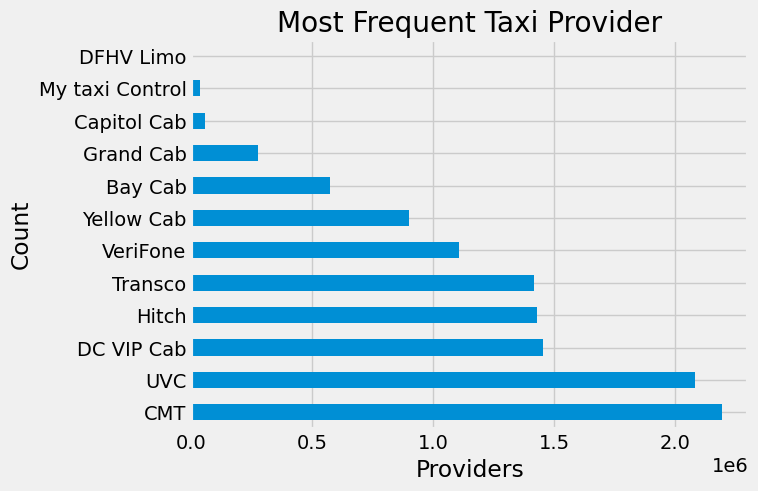

In [57]:
#plotting the Taxi Providers
ax = new_df['ProviderName'].value_counts().plot(kind='barh', title='Most Frequent Taxi Provider')
ax.set_xlabel('Providers')
ax.set_ylabel('Count')
plt.show()

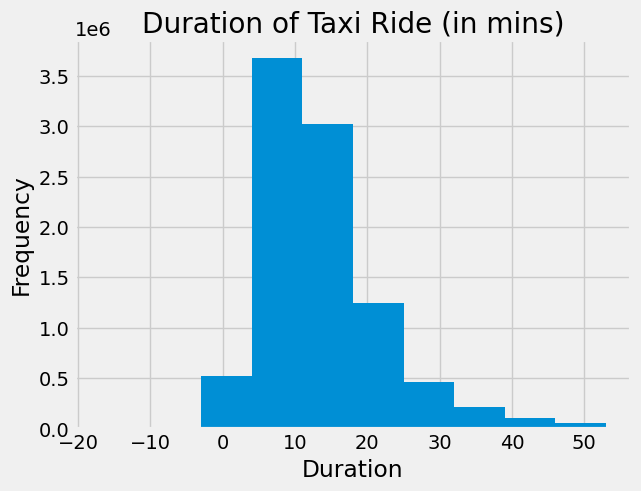

In [59]:
ax_2 = df_filtered['Duration'].plot(kind='hist', title='Duration of Taxi Ride (in mins)')  #outliers removed
ax_2.set_xlabel('Duration')
ax_2.set_ylabel('Frequency')

plt.show()

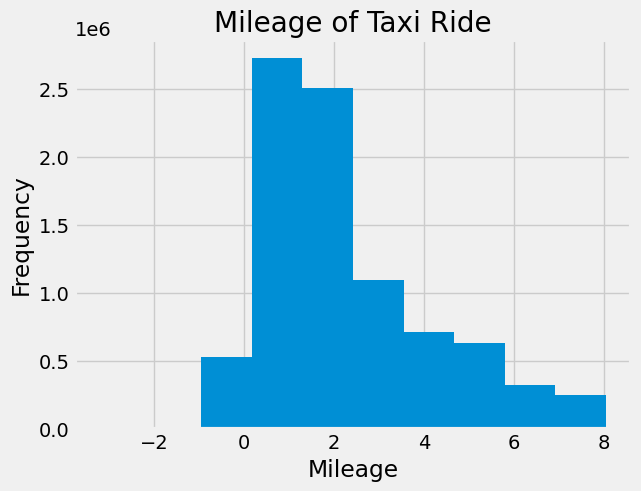

In [63]:
ax_2 = df_filtered['Mileage'].plot(kind='hist', title='Mileage of Taxi Ride')     #outliers removed
ax_2.set_xlabel('Mileage')
ax_2.set_ylabel('Frequency')

plt.show()

Multivariate Analysis

In [3]:
sns.scatterplot(x='Duration', y='Mileage', data=df_filtered)
plt.show()

NameError: name 'df_filtered' is not defined

In [ ]:
sns.pairplot(new_df, vars=['FareAmount', 'Mileage', 'Duration', 'GratuityAmount'])
plt.show()

In [ ]:
df_corr = new_df[['FareAmount', 'Mileage', 'Duration', 'GratuityAmount']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [65]:
df_filtered["ProviderName"].value_counts()

ProviderName
CMT                2108152
Hitch              1371271
Transco            1335808
UVC                1138330
VeriFone           1046333
DC VIP Cab         1019241
Yellow Cab          666472
Capitol Cab          38617
My taxi Control      33180
Bay Cab               5746
Grand Cab             2119
DFHV Limo               25
Name: count, dtype: int64

<a name="res_discussion"></a>
## Results and Discussion

The exploratory analysis of the taxi ride dataset yielded several key insights into the operational dynamics and customer trends within the taxi service industry.

1.Operational Insights: The analysis revealed patterns in metrics such as fare amount, mileage, and ride duration, providing valuable insights into the operational efficiency of taxi services. Understanding these patterns can inform strategic decision-making, such as optimizing route planning, managing fleet operations, and allocating resources effectively.

2.Customer Trends: By examining customer trends and preferences, the analysis identified opportunities for improving service delivery and enhancing customer satisfaction. Insights into factors influencing customer behavior, such as payment preferences and tipping habits, can guide the development of personalized services and promotional strategies.

3.Correlation Analysis: Correlation analysis highlighted relationships between key variables, offering a deeper understanding of their interactions. For example, the correlation between fare amount and mileage may indicate pricing structures or fare calculation methods used by taxi providers.

4.Outlier Detection: The identification and removal of outliers ensured the integrity of the dataset for further analysis. Addressing outliers in metrics such as ride duration and mileage helps mitigate the impact of anomalous data points on the overall analysis results.

5.Recommendations for Improvement: Based on the insights gained from the analysis, several recommendations can be made to enhance operational efficiency and customer satisfaction within the taxi service industry. These include optimizing route planning, implementing dynamic pricing strategies, providing driver training and incentives, enhancing customer engagement, and investing in technology solutions.

Overall, the results of the exploratory analysis provide a foundation for informed decision-making and strategic planning within the taxi service industry. By leveraging data-driven insights, taxi providers can optimize their operations, improve service quality, and ultimately deliver a better experience for customers. Continued monitoring and analysis of key metrics will be essential to adapt to changing market dynamics and maintain competitiveness in the industry.


[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion
***

In conclusion, the exploratory analysis of the taxi ride dataset has provided valuable insights into the operational dynamics and customer trends within the taxi service industry. Through data manipulation, visualization, and correlation analysis, we have identified key factors influencing metrics such as fare amount, mileage, and ride duration. Additionally, the removal of outliers has ensured the integrity of the dataset for further analysis. The pairplot visualization has offered a comprehensive view of pairwise relationships among the variables of interest, facilitating a deeper understanding of their interactions.

Based on these findings, several recommendations can be made to enhance operational efficiency and customer satisfaction within the taxi service industry:

Optimized Route Planning: Utilize insights from the analysis to optimize route planning and minimize ride duration, thereby reducing costs and improving customer experience.

Dynamic Pricing Strategies: Implement dynamic pricing strategies based on factors such as mileage, duration, and demand patterns to maximize revenue while remaining competitive.

Driver Training and Incentives: Provide driver training programs and incentives aimed at improving service quality, ensuring a positive experience for passengers.

Enhanced Customer Engagement: Leverage insights from customer trends to personalize services, offer promotions, and enhance overall customer engagement.

Investment in Technology: Invest in technology solutions such as GPS tracking, real-time analytics, and mobile applications to streamline operations and improve communication with passengers.

By incorporating these recommendations into their operations, taxi providers can achieve greater efficiency, profitability, and customer satisfaction, positioning themselves for success in a competitive market landscape. Additionally, continued analysis and monitoring of key metrics will be essential to adapt to changing market dynamics and evolving customer preferences in the future.


[ref]: #top
[Back to Table of Contents][ref]